# Exploratory Data Analysis (EDA)

## 1. Introduction

This notebook explores the *Genomics of Drug Sensitivity in Cancer (GDSC)* dataset.  
The dataset contains genomic and pharmacological data describing how different cancer cell lines respond to various drug treatments.  

The goal of this analysis is to:
- Understand the dataset’s structure and integrity  
- Assess data completeness and consistency  
- Identify outliers or anomalies  
- Summarize key findings before further modeling or analysis

## 2. Assessment of Dataset Structure

This section evaluates the overall structure of the dataset, including its dimensions, variable types, and completeness. The goal is to understand the foundational layout before proceeding to deeper analysis.

In [1]:
import pandas as pd

# Load the dataset from Parquet
df = pd.read_parquet("../data/gdsc_clean.parquet", engine="pyarrow")

# Dimensions
print("Dataset shape:", df.shape)

# Column names
print("\nColumn names:")
print(df.columns.tolist())

# Data types and non-null counts
print("\nDataset info:")
print(df.info())

# Statistical summary of numerical columns
print("\nSummary statistics:")
display(df.describe())

# Preview first few rows
df.head()

Dataset shape: (2468, 19)

Column names:
['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME', 'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)', 'Microsatellite instability Status (MSI)', 'Screen Medium', 'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET', 'TARGET_PATHWAY']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   COSMIC_ID                                2468 non-null   Int64   
 1   CELL_LINE_NAME                           2468 non-null   string  
 2   TCGA_DESC                                2460 non-null   category
 3   DRUG_ID                                  2468 non-null   Int64   
 4   DRUG_NAME                                2468 non-null   string  

,COSMIC_ID,DRUG_ID,LN_IC50,AUC,Z_SCORE
count,2468.0,2468.0,2468.000000,2468.000000,2468.000000
mean,986198.944489,1003.916126,-0.940266,0.819678,0.000576
std,216046.344962,0.832468,3.428846,0.149018,0.999388
min,683667.0,1003.0,-7.530958,0.260719,-2.688692
25%,906807.75,1003.0,-3.746083,0.733137,-0.770615
50%,909713.0,1004.0,-1.590407,0.863975,-0.119720
75%,1240132.5,1005.0,1.742901,0.940245,0.666575
max,1789883.0,1005.0,9.229988,0.994588,3.377354


,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


### Observations after dataset structure assessment

- The dataset contains **2468 rows and 19 columns**, providing a substantial amount of data for exploratory analysis.
- **Key identifiers:** `COSMIC_ID` identifies each cell line, `DRUG_ID` identifies each drug. Together, they can uniquely identify each experimental record.  
- Column types after casting are now appropriate: **2 Int64**, **3 float64**, **3 string**, and **11 categorical** columns, which will help with further analysis.  
- Numeric columns (`LN_IC50`, `AUC`, `Z_SCORE`) have reasonable ranges. For example, `LN_IC50` ranges from about -7.53 to 9.23, and `AUC` ranges from 0.26 to 0.99, suggesting no obvious extreme errors.  
- Some columns have missing values: for instance, `Cancer Type (matching TCGA label)` has 1947 non-null entries, indicating ~21% missing. Other categorical columns like `GDSC Tissue descriptor 1` and `2` also have some missing values.  
- Overall, the dataset structure is suitable for EDA, and the next step will be a more detailed evaluation of **data completeness and integrity**, including missing values and duplicates.

## 3. Data Completeness & Integrity Assessment

In this section, we evaluate the completeness and integrity of the dataset.  
We will check for missing values, duplicate rows, and consistency in categorical variables to ensure data quality before further analysis.

In [2]:
# Check missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
})
display(missing_df.sort_values(by='missing_percent', ascending=False))

# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)

# Examine categorical columns for value distributions
categorical_cols = df.select_dtypes(include='category').columns.tolist()
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))

,missing_count,missing_percent
Cancer Type (matching TCGA label),521,21.110211
Microsatellite instability Status (MSI),110,4.457050
GDSC Tissue descriptor 2,88,3.565640
Methylation,88,3.565640
Growth Properties,88,3.565640
Screen Medium,88,3.565640
GDSC Tissue descriptor 1,88,3.565640
CNA,88,3.565640
Gene Expression,88,3.565640
TCGA_DESC,8,0.324149


Number of duplicate rows: 0

Column: TCGA_DESC
TCGA_DESC
UNCLASSIFIED    464
LUAD            164
BRCA            144
SCLC            137
COREAD          129
SKCM            116
ESCA             94
HNSC             91
PAAD             86
OV               84
GBM              83
NB               78
ALL              74
DLBC             72
STAD             70
KIRC             64
LAML             61
MESO             53
BLCA             51
MM               47
THCA             44
LIHC             43
LUSC             41
CESC             40
LGG              35
LCML             28
UCEC             27
PRAD             18
MB               12
NaN               8
CLL               6
ACC               3
OTHER             1
Name: count, dtype: int64

Column: GDSC Tissue descriptor 1
GDSC Tissue descriptor 1
lung_NSCLC           272
urogenital_system    271
leukemia             210
aero_dig_tract       187
lymphoma             167
breast               147
lung_SCLC            138
nervous_system       12

### Observations after assessment of dataset Completeness & Integrity

- `Cancer Type (matching TCGA label)` has the highest percentage of missing values (~21%), other columns have smaller gaps.  
- No duplicate rows were found, indicating all entries are unique.
- All categorical columns were inspected using `value_counts()`.
- Categorical columns have reasonable distributions; a few NaNs exist that may need handling in preprocessing, e.g., `Cancer Type (matching TCGA label)` (521 missing), `MSI` (110 missing), etc.
- No obvious typos or inconsistent category names were found.   
- Overall, the categories are consistent and interpretable for further analysis, so the dataset is complete enough for exploratory analysis, with minor missing values to consider in later steps.

## 4. Outlier and Anomaly Detection

In this section, we evaluate numeric features for extreme values or unusual patterns.  
Detecting outliers helps understand the data distribution and identify potential errors or interesting biological signals.

In [3]:
numeric_cols = ['LN_IC50', 'AUC', 'Z_SCORE']

# Summary statistics
display(df[numeric_cols].describe())

# Simple outlier detection using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")

# Z-score-specific outlier check
outliers_high = df[df["Z_SCORE"] > 2.82]
outliers_low = df[df["Z_SCORE"] < -2.82]

print("\nZ_SCORE Outlier Breakdown:")
print("High (resistant):", len(outliers_high))
print("Low (sensitive):", len(outliers_low))

,LN_IC50,AUC,Z_SCORE
count,2468.000000,2468.000000,2468.000000
mean,-0.940266,0.819678,0.000576
std,3.428846,0.149018,0.999388
min,-7.530958,0.260719,-2.688692
25%,-3.746083,0.733137,-0.770615
50%,-1.590407,0.863975,-0.119720
75%,1.742901,0.940245,0.666575
max,9.229988,0.994588,3.377354



Column: LN_IC50
Lower bound: -11.979558625000001, Upper bound: 9.976376375000001
Number of outliers: 0

Column: AUC
Lower bound: 0.4224742499999999, Upper bound: 1.25090825
Number of outliers: 33

Column: Z_SCORE
Lower bound: -2.92640025, Upper bound: 2.82235975
Number of outliers: 12

Z_SCORE Outlier Breakdown:
High (resistant): 12
Low (sensitive): 0


### Observations after Outlier and Anomaly Detection

- `LN_IC50` has no outliers according to the IQR method, suggesting the distribution is relatively balanced despite a wide range (-7.53 to 9.23).  
- `AUC` has 33 outliers, mostly on the lower end (below ~0.42), which may indicate extreme drug sensitivity or potential measurement anomalies.  
- `Z_SCORE` has 12 outliers beyond ±2.82, representing extreme deviations from the mean.  
- Overall, the numeric features are generally well-behaved. Outliers are relatively few and likely reflect **biological variability** rather than data errors.

## 5. Data Visualization

In this section, we explore the dataset visually to better understand the distributions, trends, and relationships between variables.  
We will examine numeric features (`LN_IC50`, `AUC`, `Z_SCORE`) to assess drug sensitivity and variability, and categorical features (e.g., tissue types, cancer types, TARGET_PATHWAY) to evaluate the composition of cell lines and drugs.  
Visualizations include histograms, boxplots, scatterplots, countplots, bar charts and heatmaps to highlight patterns in drug response.

### Distribution of Numeric Features

The following histograms show the distributions of key numeric variables: **LN_IC50**, **AUC**, and **Z_SCORE**.

- **LN_IC50** represents the log-transformed half-maximal inhibitory concentration, indicating drug sensitivity (lower values → more sensitive).  
- **AUC** measures the area under the dose-response curve, reflecting overall drug response (higher AUC → more resistant).  
- **Z_SCORE** standardizes LN_IC50 values, helping identify extreme sensitivities or resistances.

These distributions allow us to visually inspect skewness, spread, and potential outliers in the dataset.

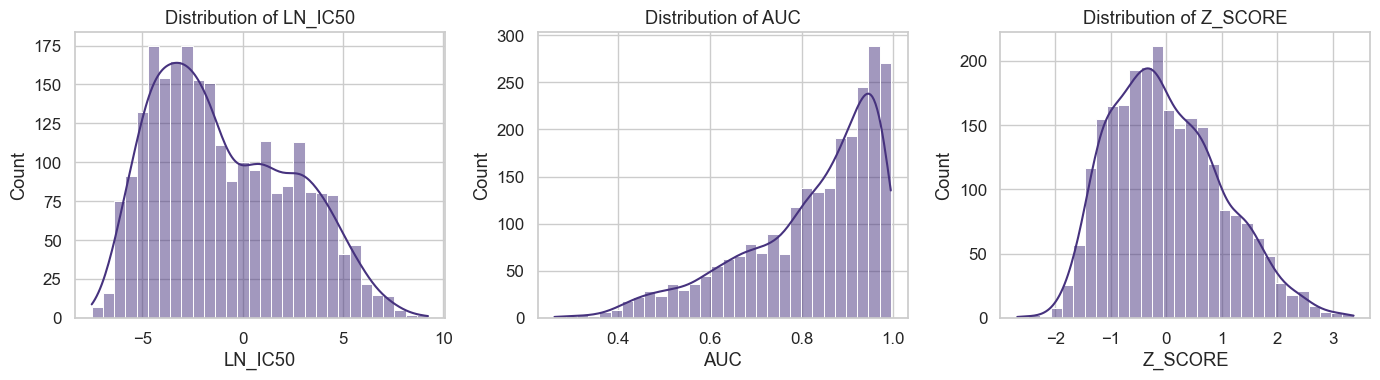

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# set Seaborn style and palette
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

plt.figure(figsize=(14, 4))

for i, col in enumerate(["LN_IC50", "AUC", "Z_SCORE"]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Observations from Numeric Feature Distributions

- **LN_IC50** is right-skewed: most drugs are effective at low concentrations, but a few require much higher doses.  
- **AUC** is left-skewed: the majority of samples respond well to treatment, with some resistant cases.  
- **Z_SCORE** is roughly normal: standardized values are centered around 0, suitable for statistical modeling.  

Overall, the distributions highlight both typical responses and extreme cases, which may reflect biological variability and potential outliers.

### Boxplots of Drug Sensitivity Metrics

The boxplots show the spread and potential outliers of **LN_IC50**, **AUC**, and **Z_SCORE**.

- **LN_IC50**: Most values are clustered around the lower range, with a few extreme high values.  
- **AUC**: Mostly high values, with some low-response outliers.  
- **Z_SCORE**: Centered around 0, highlighting standardized extreme sensitivities or resistances.

These plots help identify outliers and compare the variability of the numeric features.

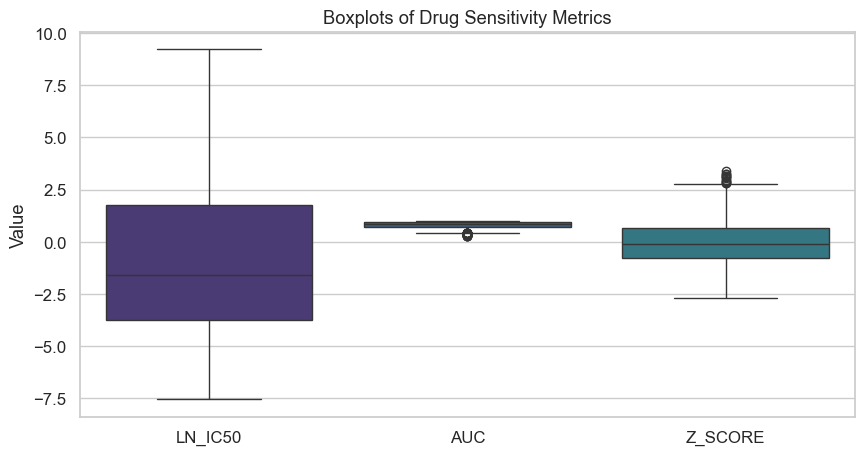

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["LN_IC50", "AUC", "Z_SCORE"]])
plt.title("Boxplots of Drug Sensitivity Metrics")
plt.ylabel("Value")
plt.show()

### Boxplots of Drug Sensitivity Metrics

**LN_IC50**  
- **Range:** Wide, spanning approximately from -7.53 to 9.23.  
- **Spread:** High variability across samples.  
- **Outliers:** None detected, all values fall within the whiskers — distribution is relatively balanced.  

**AUC**  
- **Range:** Narrow, centered around 0.82–1.0.  
- **Spread:** Low variability overall.  
- **Outliers:** 33 data points below ~0.42, indicating extreme drug sensitivity or potential measurement anomalies.  

**Z_SCORE**  
- **Range:** Moderate, roughly between -2.69 and 3.38.  
- **Spread:** Symmetric overall.  
- **Outliers:** 12 data points above +2.82, reflecting extreme resistance. No low-end outliers are present, likely due to earlier trimming of the dataset.

### Relationships Between Drug Sensitivity Metrics

We explore the relationships among the numeric drug sensitivity metrics: **LN_IC50**, **AUC**, and **Z_SCORE**.

- **Pairplot**: Visualizes joint distributions and correlations between metrics.

- **Correlation Heatmap**: Quantifies the relationships.

These plots help identify **linear relationships** and patterns among numeric features.

<Figure size 1000x800 with 0 Axes>

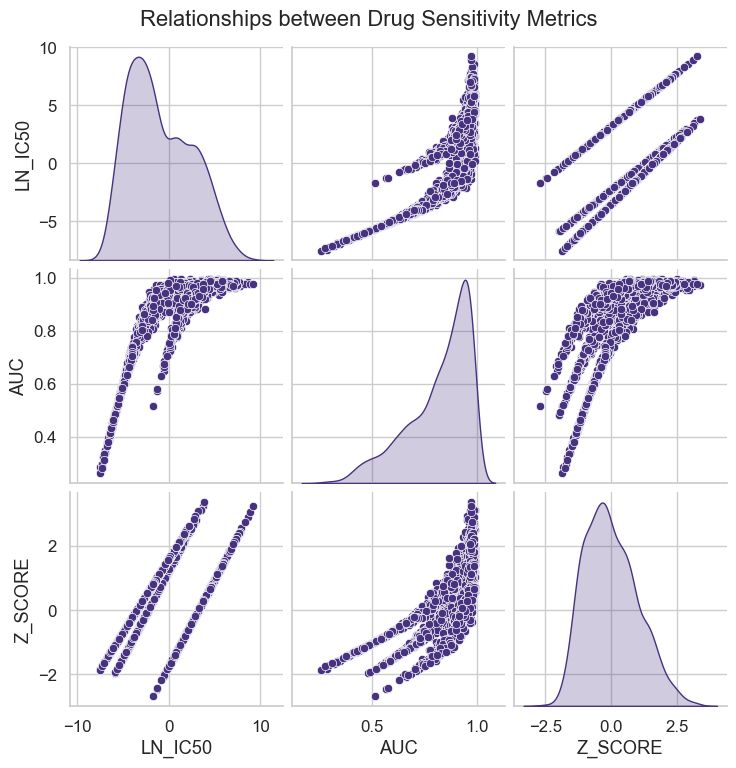

In [6]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[["LN_IC50", "AUC", "Z_SCORE"]], diag_kind="kde")
plt.suptitle("Relationships between Drug Sensitivity Metrics", y=1.02)
plt.show()

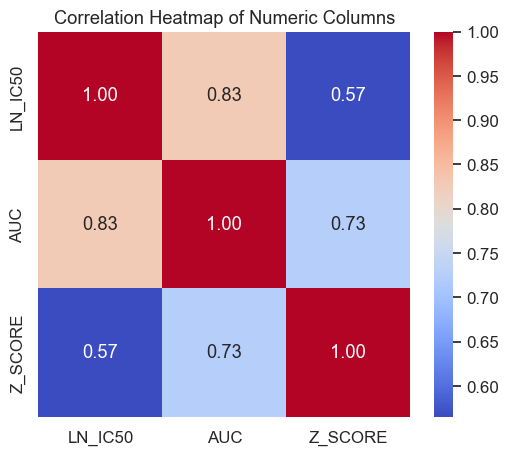

In [7]:
numeric_cols = ['LN_IC50', 'AUC', 'Z_SCORE']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

### Observations: Relationships Between Drug Sensitivity Metrics

- LN_IC50 and AUC are strongly positively correlated (0.83): less potent drugs tend to show resistant cells.  
- LN_IC50 and Z_SCORE show a moderate positive correlation (0.57).  
- AUC and Z_SCORE are strongly positively correlated (0.73).  

These relationships indicate that the three drug sensitivity metrics are generally aligned, helping to interpret patterns and identify outliers in the dataset.

### Distribution of Categorical Features

These charts show the frequency of cell lines across key categorical variables:

- **TCGA_DESC**: Tumor classifications according to TCGA.  
- **GDSC Tissue descriptor 1 & 2**: Broader and more specific tissue types of the cell lines.  
- **Cancer Type (matching TCGA label)**: Mapping of cell lines to TCGA cancer types, with some entries "Unable to classify" when no match exists.

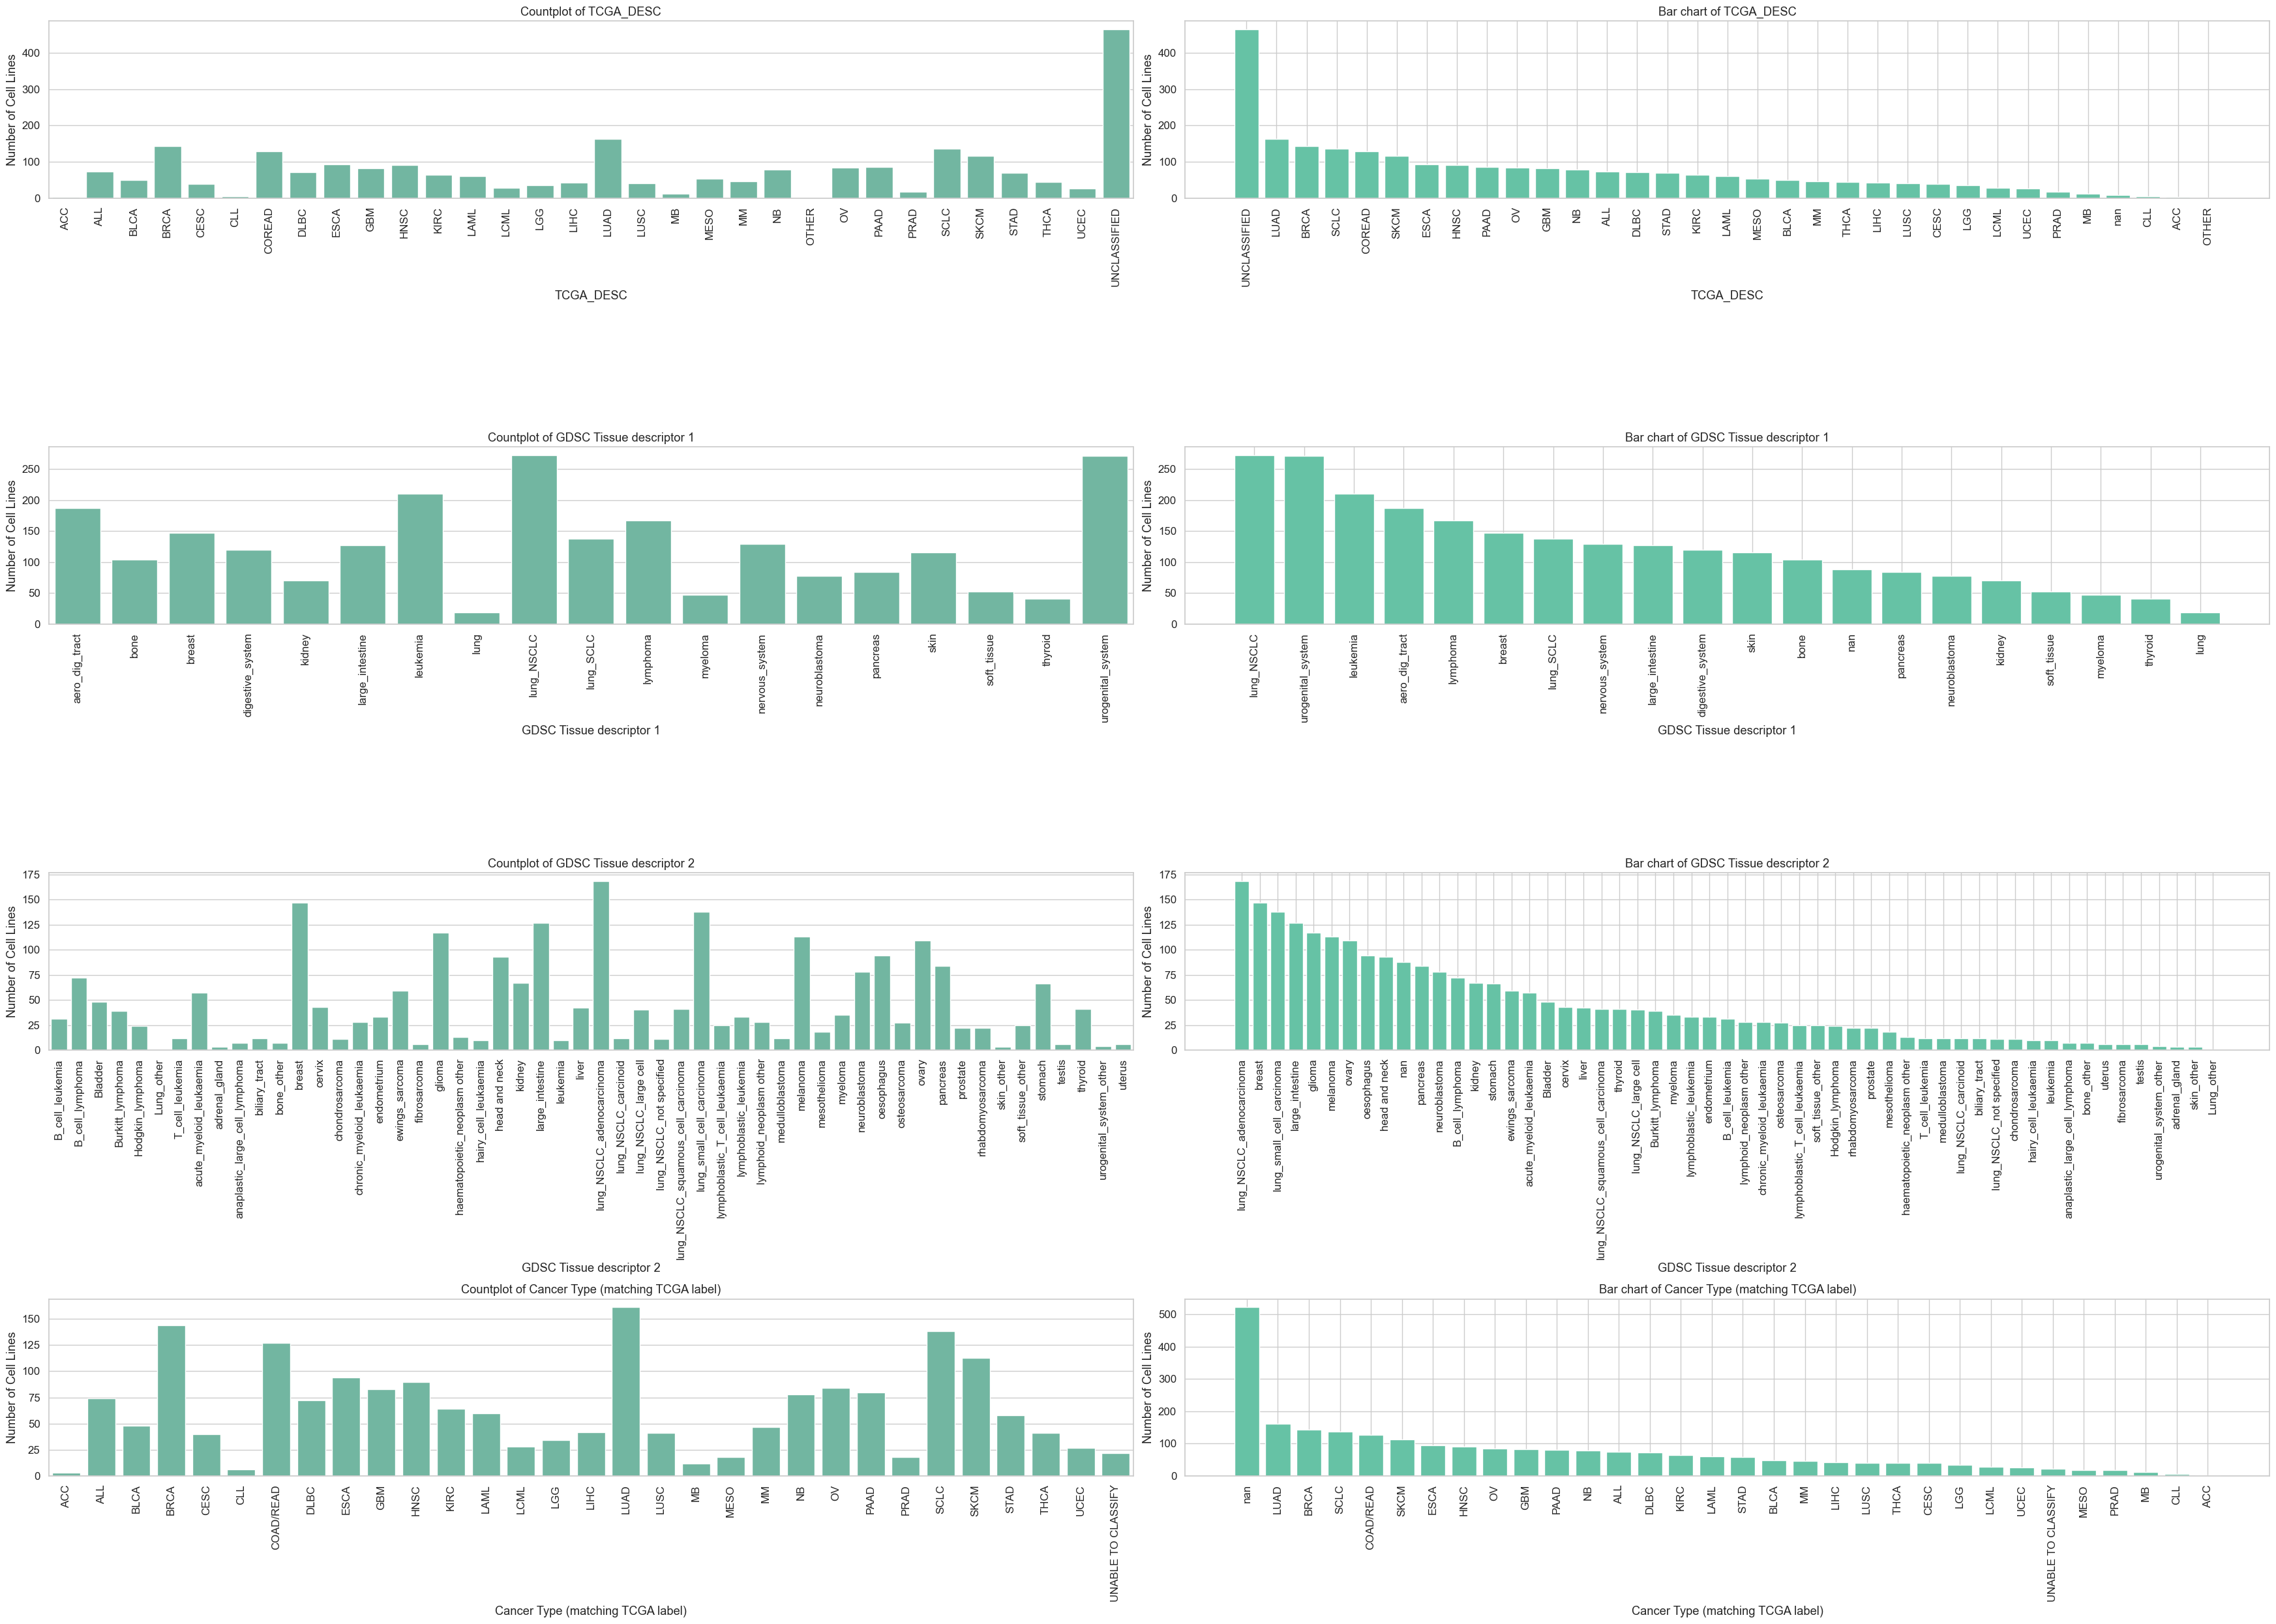

In [8]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams.update({'font.size': 10})

cat_cols = ['TCGA_DESC', 'GDSC Tissue descriptor 1', 
            'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)']

fig, axes = plt.subplots(4, 2, figsize=(35, 25))  # 4 rows, 2 columns: countplot + bar chart for each

for i, col in enumerate(cat_cols):
    # Countplot (Seaborn)
    sns.countplot(x=col, data=df, ax=axes[i,0])
    axes[i,0].set_title(f'Countplot of {col}')
    axes[i,0].set_xlabel(col)                   # x-axis label
    axes[i,0].set_ylabel('Number of Cell Lines')# y-axis label
    axes[i,0].tick_params(axis='x', rotation=90)

    # Bar chart (Matplotlib)
    counts = df[col].value_counts(dropna=False)
    axes[i,1].bar(counts.index.astype(str), counts.values)
    axes[i,1].set_title(f'Bar chart of {col}')
    axes[i,1].set_xlabel(col)                   # x-axis label
    axes[i,1].set_ylabel('Number of Cell Lines')# y-axis label
    axes[i,1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Observations:**
- **TCGA_DESC**: Tumor classifications according to TCGA. The most frequent category is `UNCLASSIFIED` (464 samples), followed by LUAD, BRCA, SCLC, and COREAD. A few entries are NaN or rare categories like `OTHER`.
- **GDSC Tissue descriptor 1**: Broad tissue types of cell lines. Most common are `lung_NSCLC` (272), `urogenital_system` (271), and `leukemia` (210). Some entries are missing (NaN = 88).
- **GDSC Tissue descriptor 2**: More specific tissue types. Top categories include `lung_NSCLC_adenocarcinoma` (168), `breast` (147), and `lung_small_cell_carcinoma` (138). Missing values are also present (NaN = 88).
- **Cancer Type (matching TCGA label)**: Mapping of cell lines to TCGA cancer types. Most frequent is NaN (521), followed by LUAD, BRCA, SCLC, and COAD/READ. `UNABLE TO CLASSIFY` appears in 22 cases.

- Many cell lines remain unclassified or unmatched, which may influence downstream analysis.  
- Dataset is imbalanced: a few cancer types and tissue descriptors dominate.  
- Understanding these distributions helps interpret results from drug sensitivity metrics and ensures awareness of potential biases.

### Average Drug Sensitivity Across Categories

These bar plots summarize the **average LN_IC50** across key categorical groups:

- **Average LN_IC50 per TARGET_PATHWAY**: Shows which molecular pathways are associated with more or less sensitive drug responses. Lower LN_IC50 values indicate higher sensitivity, while higher values suggest resistance.

- **Average LN_IC50 per Cancer Type**: Highlights cancer types that are generally more responsive or resistant to drugs in this dataset. Some cancer types have few samples, so their averages may be less reliable.

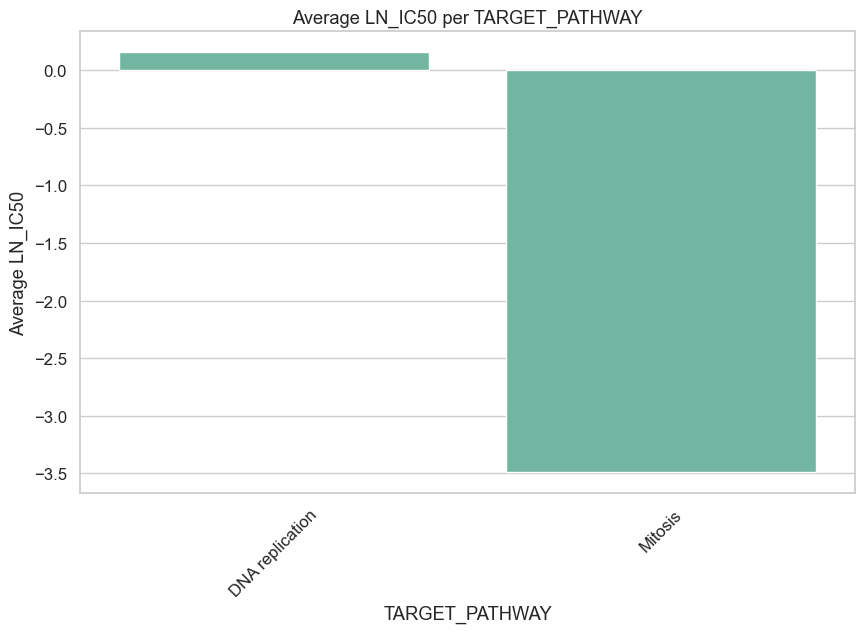

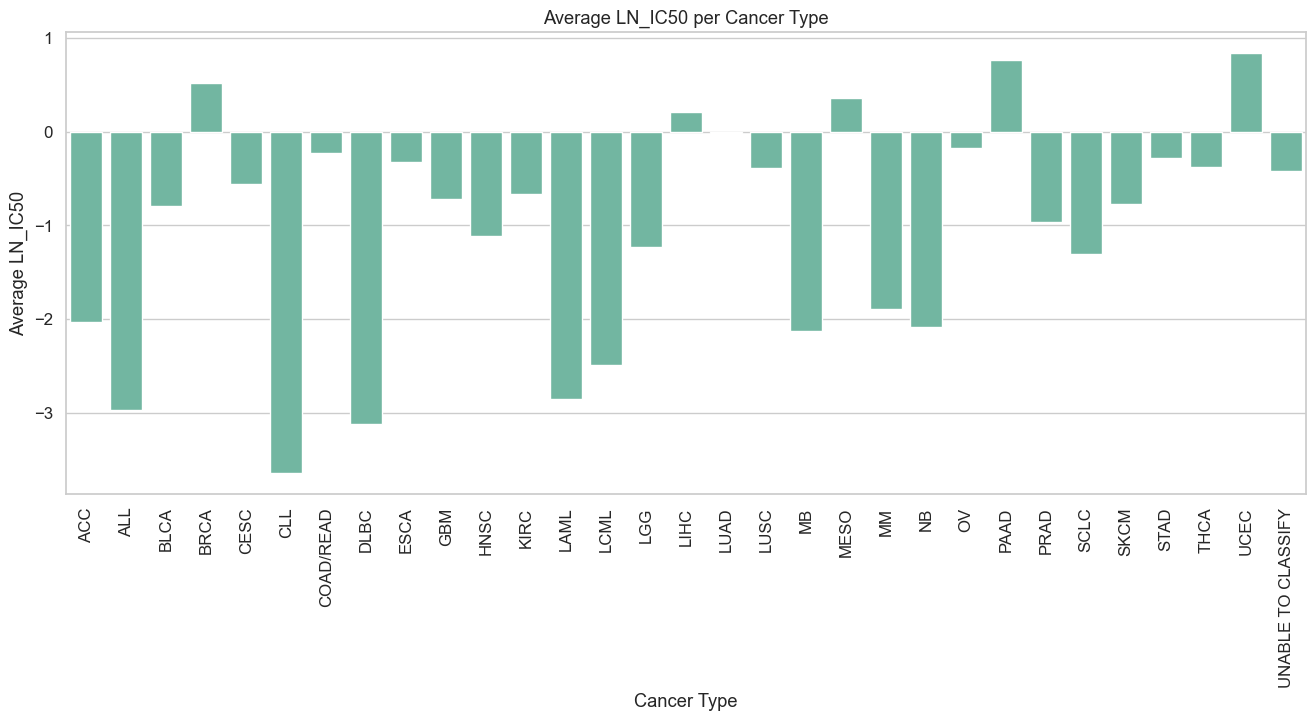

In [9]:
# Average LN_IC50 per TARGET_PATHWAY
plt.figure(figsize=(10,6))
sns.barplot(x='TARGET_PATHWAY', y='LN_IC50', data=df, errorbar=None)
plt.title('Average LN_IC50 per TARGET_PATHWAY')
plt.ylabel('Average LN_IC50')
plt.xlabel('TARGET_PATHWAY')
plt.xticks(rotation=45)
plt.show()

# Average LN_IC50 per Cancer Type
plt.figure(figsize=(16,6))
sns.barplot(x='Cancer Type (matching TCGA label)', y='LN_IC50', data=df, errorbar=None)
plt.title('Average LN_IC50 per Cancer Type')
plt.ylabel('Average LN_IC50')
plt.xlabel('Cancer Type')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- **Most sensitive cancer types (lowest average LN_IC50):**  
  - CLL, ALL, DLBC  
  These bars fall well below zero, indicating strong drug response.

- **Least sensitive cancer types (highest average LN_IC50):**  
  - UCEC, PAAD  
  These bars are above zero, suggesting weaker drug response.

- **Majority of cancer types:**  
  Fall between -2 and 0, showing moderate sensitivity to drugs.



  
| Pathway           | Average LN_IC50 | Interpretation |
|------------------|----------------|----------------|
| DNA replication  | above 0 | Drugs targeting this pathway require higher concentrations, indicating lower potency |
| Mitosis          | between -3.5 and 0    | Drugs targeting mitosis are more potent, requiring lower concentrations |

### Drug Response vs Genomics Features

We explore how key drug response metrics (LN_IC50, Z_SCORE) relate to genomics features (CNA, Gene Expression, Methylation).

1. **Boxplots**  
   Show the distribution of LN_IC50 and Z_SCORE for samples with/without each genomics feature.  
   - Differences in medians or spreads may indicate that the presence of a feature affects drug sensitivity.

2. **Countplots**  
   Display the number of samples with each genomics feature.  
   - Helps assess class balance and coverage across features.

3. **Correlation Heatmap**  
   Numeric encoding of genomics features (Y=1, N=0) allows computing correlations with drug response metrics.  
   - Positive correlations suggest that a feature may associate with higher LN_IC50 or Z_SCORE (reduced sensitivity).  
   - Negative correlations suggest increased sensitivity when the feature is present.

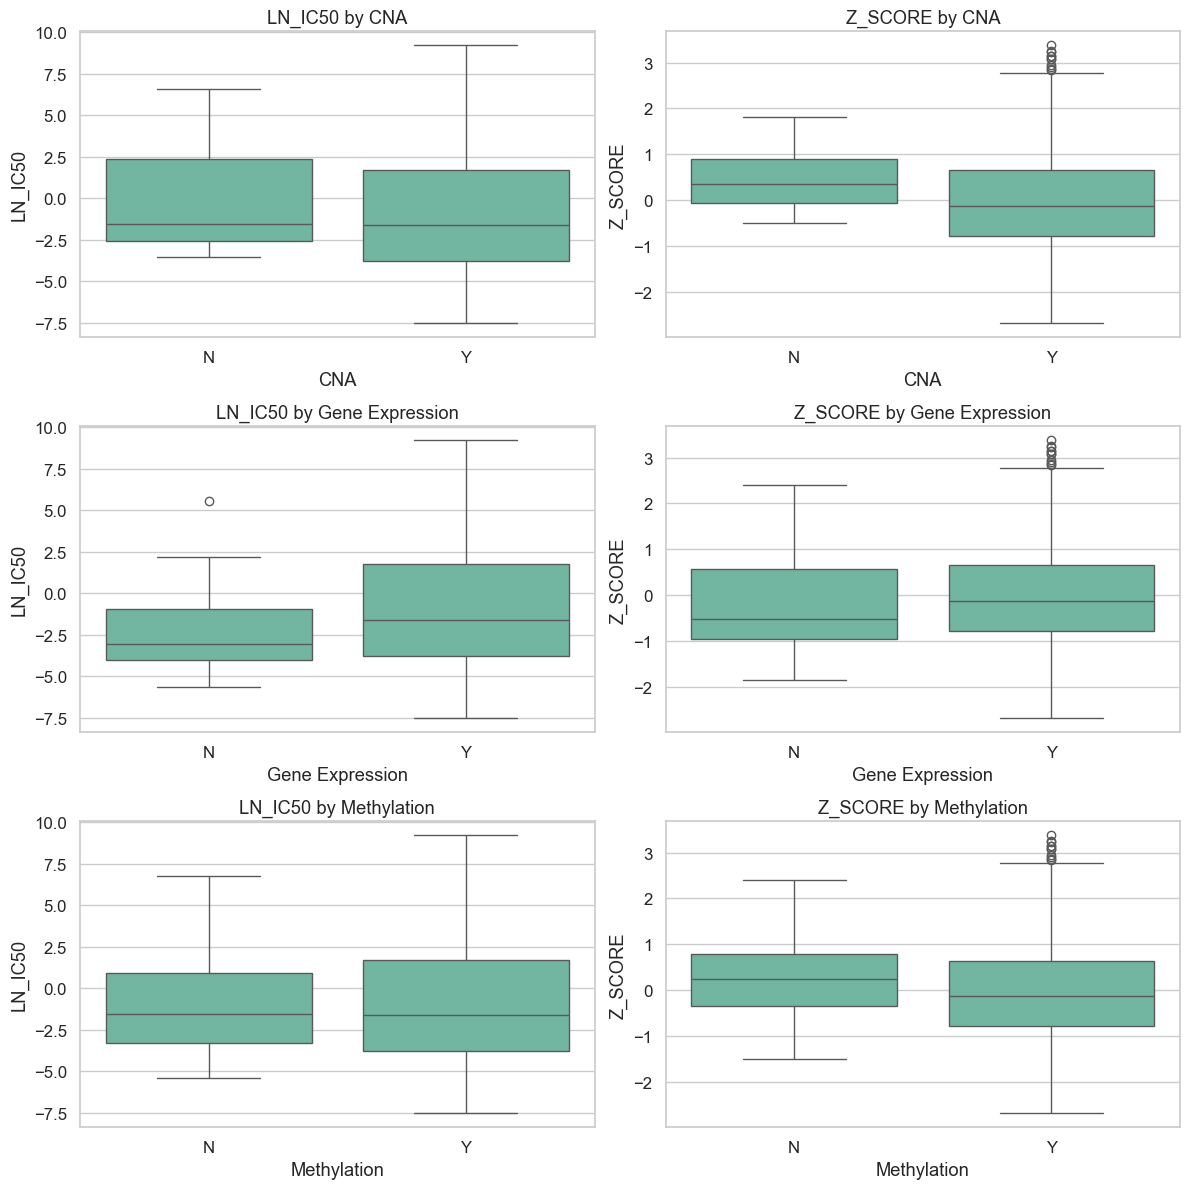

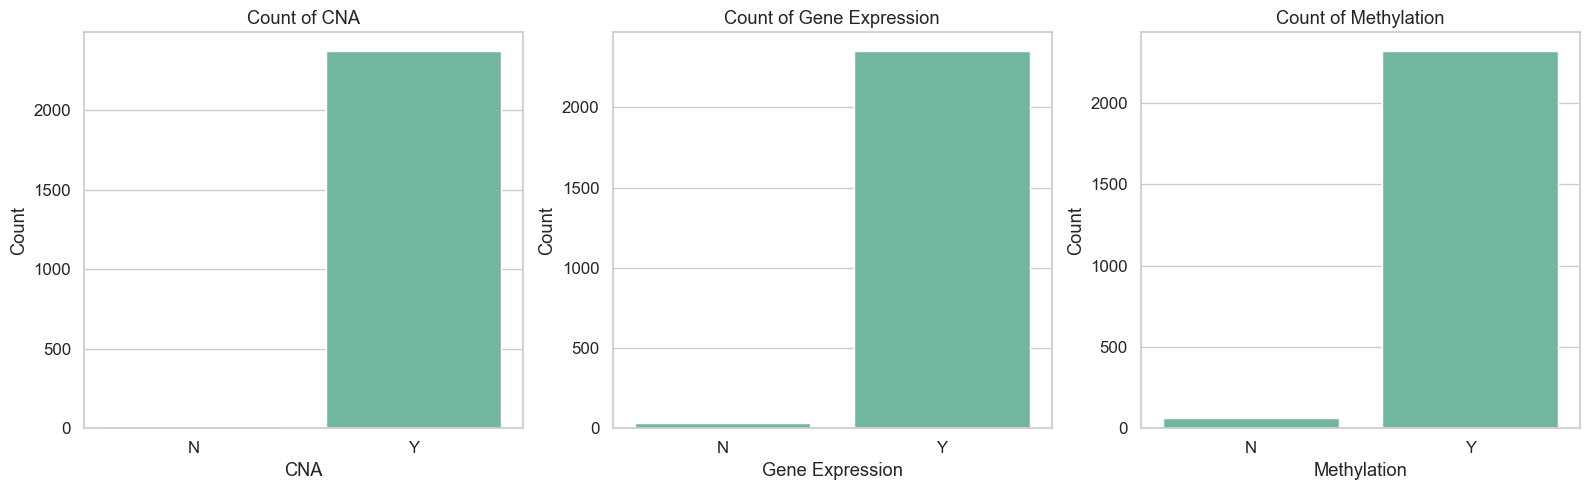

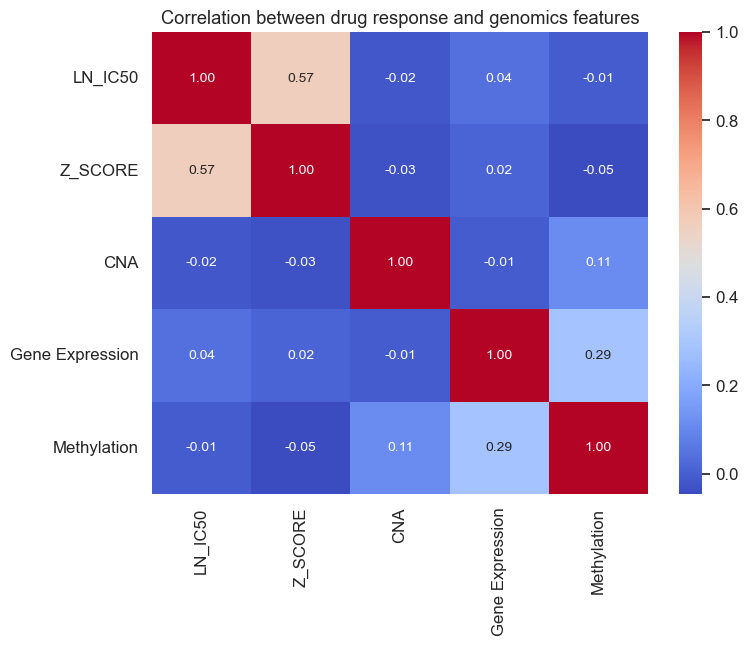

In [10]:
# ---- 1. Boxplots of drug response vs genomics features ----
genomics_cols = ['CNA', 'Gene Expression', 'Methylation']
numeric_cols = ['LN_IC50', 'Z_SCORE']  # we can choose which metric to plot

fig, axes = plt.subplots(len(genomics_cols), len(numeric_cols), figsize=(12, 12))

for i, g_col in enumerate(genomics_cols):
    for j, n_col in enumerate(numeric_cols):
        sns.boxplot(x=g_col, y=n_col, data=df, ax=axes[i,j])
        axes[i,j].set_title(f'{n_col} by {g_col}')
        axes[i,j].set_xlabel(g_col)
        axes[i,j].set_ylabel(n_col)

plt.tight_layout()
plt.show()


# ---- 2. Countplots for genomics features ----
fig, axes = plt.subplots(1, len(genomics_cols), figsize=(16,5))
for i, g_col in enumerate(genomics_cols):
    sns.countplot(x=g_col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {g_col}')
    axes[i].set_xlabel(g_col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


# ---- 3. Correlation heatmap ----
# Encode genomics features as 0/1
df_encoded = df.copy()
for col in genomics_cols:
    df_encoded[col] = df_encoded[col].map({'Y':1, 'N':0})

corr_cols = numeric_cols + genomics_cols
corr_matrix = df_encoded[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between drug response and genomics features')
plt.show()

**Observations: Drug Response vs Genomics Features**

- **LN_IC50 vs CNA:** Correlation = -0.02 → essentially no relationship; copy number alterations do not strongly affect drug sensitivity.  
- **LN_IC50 vs Methylation:** Correlation = -0.01 → negligible effect; methylation status does not appear to influence LN_IC50.  
- **LN_IC50 vs Gene Expression:** Correlation = 0.04 → very weak positive association; higher gene expression shows minimal influence on drug sensitivity.  

Overall, the genomics features (CNA, Gene Expression, Methylation) show very weak correlations with drug response metrics, suggesting these factors alone do not strongly predict LN_IC50 or Z_SCORE across this dataset.

**Missing Values Overview**

The heatmap shows the presence of missing values across all columns in the dataset.

<Axes: >

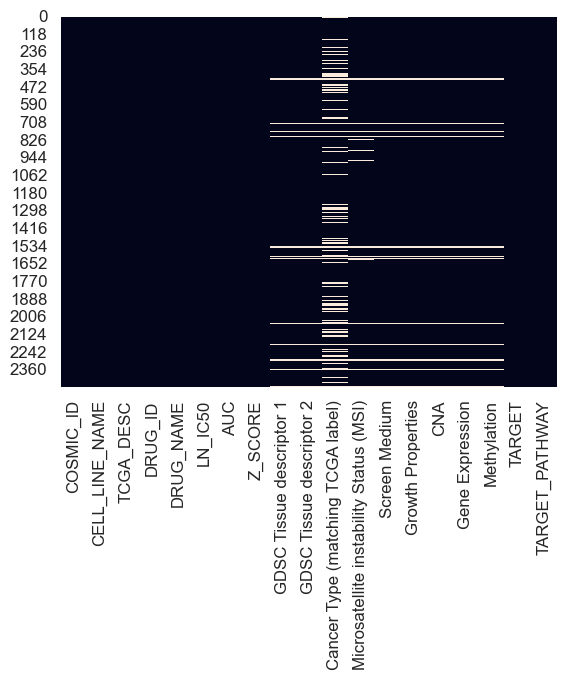

In [11]:
sns.heatmap(df.isnull(), cbar=False)

**Observations:**
- The **'Cancer Type (matching TCGA label)'** column has the highest proportion of missing data (~21%), likely due to incomplete cross-referencing between datasets.  
- Several features, including **CNA**, **Methylation**, and **Gene Expression**, share identical missing rates (~3.6%), suggesting joint data collection gaps.  
- Numeric drug response metrics (**LN_IC50**, **Z_SCORE**, **AUC**) are fully complete, ensuring reliability for downstream modeling.  
- Overall, missingness is moderate and largely concentrated in categorical and genomic descriptors, which can be imputed or filtered depending on analysis needs.

## Final Summary & Conclusions

- **Dataset Overview:**  
  The dataset used is a **trimmed version of the original GDSC dataset**, containing 2,468 records and 19 columns. Each record represents a unique drug–cell line experiment identified by `COSMIC_ID` (cell line) and `DRUG_ID` (drug). It includes numeric drug response metrics, categorical cancer annotations, and selected genomic indicators (CNA, Gene Expression, and Methylation).

- **Data Completeness & Integrity:**  
  The dataset is mostly complete, with only minor missingness.  
  - The column `Cancer Type (matching TCGA label)` has the highest missing rate (~21%).  
  - Most genomic and categorical descriptors have around 3–4% missing data.  
  - No duplicate records were detected, confirming data integrity.  
  Because this is a **pre-filtered subset**, many low-quality or incomplete entries from the full GDSC resource were already excluded before analysis.

- **Numeric Features & Outliers:**  
  The main numeric metrics — `LN_IC50`, `AUC`, and `Z_SCORE` — fall within biologically plausible ranges.  
  - Outlier detection identified **33 AUC** outliers (mostly below ~0.42) and **12 Z_SCORE** outliers (above +2.82), both likely reflecting true biological variation.  
  - `LN_IC50` showed no statistical outliers, suggesting consistent experimental scaling within this trimmed dataset.  
  Together, these features provide complementary perspectives on drug potency, response, and standardized sensitivity.

- **Relationships & Correlations:**  
  Correlation analysis revealed strong positive associations among response metrics:  
  **LN_IC50 vs AUC:** 0.83, **LN_IC50 vs Z_SCORE:** 0.57, **AUC vs Z_SCORE:** 0.73.  
  These indicate consistent yet non-redundant measures of drug efficacy.

- **Pathway and Cancer-Type Insights:**  
  - Drugs targeting **Mitosis** pathways showed the **lowest average LN_IC50**, indicating strong potency.  
  - Drugs targeting **DNA replication** tended to have higher average LN_IC50, reflecting lower potency.  
  - Among cancer types, **CLL**, **ALL**, and **DLBC** were most sensitive (lowest LN_IC50), while **UCEC** and **PAAD** appeared more resistant.  
  Most cancer types cluster between -2 and 0, suggesting moderate overall sensitivity across lineages.

- **Genomic Features:**  
  The genomic indicators (**CNA**, **Gene Expression**, **Methylation**) showed very weak correlations with drug response metrics (|r| < 0.05).  
  This suggests that **single-omic factors alone** may not be sufficient to explain drug sensitivity — highlighting the need for **multi-omic or pathway-level integration** in downstream modeling.

- **Overall Assessment:**  
  This **trimmed GDSC subset** is clean, balanced, and well-suited for exploratory data analysis.  
  Despite minor missing data and limited genomic correlation, it effectively represents diverse drug–cancer interactions and provides a strong foundation for further **predictive modeling or biomarker discovery**.
